In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

# https://datascienceplus.com/principal-component-analysis-pca-with-python/

In [2]:

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

In [3]:
X_train.shape

(124, 13)

In [4]:
# Fit to data and predict using pipelined GNB and PCA
number_components = 3

unscaled_clf = make_pipeline(PCA(n_components=number_components), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=number_components), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [5]:
# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")


Prediction accuracy for the normal test dataset with PCA
92.59%


Prediction accuracy for the standardized test dataset with PCA
98.15%



In [6]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]



In [7]:
pca_trained = pca_std.transform(X_train)

In [10]:
pca_trained = pd.DataFrame(pca_trained)
pca_trained_c = pd.DataFrame(pca_std.components_)
pca_trained


,0,1,2
0,171.032489,-260.093116,-29.144408
1,198.124333,-292.576523,-36.437519
2,228.901703,-337.503851,-40.990376
3,260.539305,-383.026687,-54.505634
4,94.236190,-143.399940,-3.186441
...,...,...,...
119,126.124843,-190.594121,-9.901404
120,152.734760,-227.974496,-23.523739
121,444.662156,-645.230049,-116.969601
122,147.520433,-222.105329,-21.430680


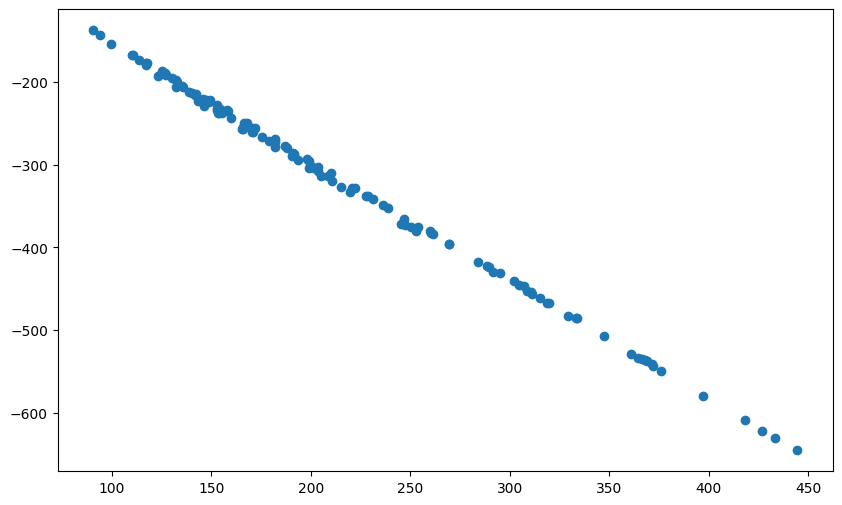

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(pca_trained[0],pca_trained[1])
plt.show()

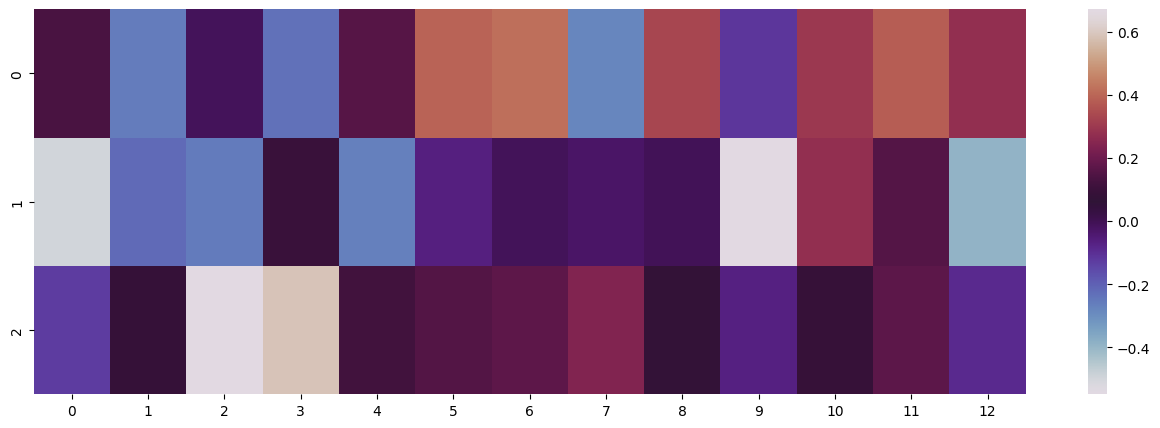

In [16]:
fig, ax = plt.subplots(figsize=(16,5))
sns.heatmap(pca_trained_c,cmap='twilight')
plt.show()